In [1]:
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import scanpy as sc
import pandas as pd

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
rna = sc.read("Lung_TB_T_Cells_CITESEQ_RNA.h5ad")
adata = rna
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 500089 × 33538
    obs: 'cell_id', 'nUMI', 'nGene', 'percent_mito', 'batch', 'TB_status', 'UMAP_1', 'UMAP_2', 'cluster_name', 'cluster_ids', 'donor'

In [4]:
scrub = scr.Scrublet(adata.X)

In [5]:
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.74
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 8.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 1.3%
Elapsed time: 3995.4 seconds


In [6]:
doublet_scores, predicted_doublets

(array([0.10827648, 0.25437865, 0.28350046, ..., 0.18518519, 0.11484507,
        0.24296812]),
 array([False, False, False, ..., False, False, False]))

In [7]:
df_scores = pd.DataFrame({'scrublet_doublet_scores': doublet_scores, 'scrublet_predicted_doublets': predicted_doublets})

In [8]:
df_scores.to_csv("Scrublet_predicted.tsv", sep="\t")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


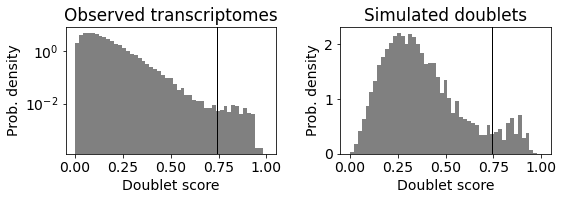

In [9]:
scrub.plot_histogram();

In [ ]:
#print('Running UMAP...')
#scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

Running UMAP...


In [ ]:
#scrub.plot_embedding('UMAP', order_points=True);